In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras import layers,losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [2]:
# train_test_split
(x_train, y_train),(x_test,y_test) = mnist.load_data()

# scaling pixels in the range [0,1]
x_train = x_train.astype('float32')/255. 
x_test = x_test.astype('float32')/255.

11490434/11490434 [==============================] - 0s 0us/step


**Plot the numbers**

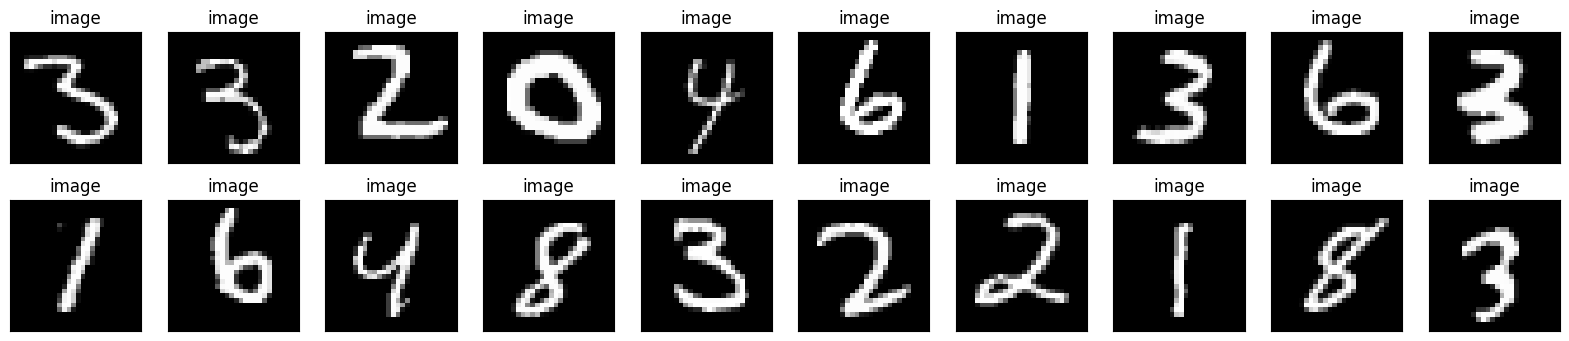

In [3]:
import random
n = 20
plt.figure(figsize=(20,4))
for i in range(0,n):
    ax = plt.subplot(2,10,i+1) # 1 row ,n cols
    i = random.randint(0, 60000-1)
    plt.imshow(x_train[i])
    plt.title('image')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [4]:
latent_dim = 64

class Autoencoder(Model):
    def __init__(self,latent_dim):
        super(Autoencoder,self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            layers.Flatten(), # 784 (28*28)
            layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(784,activation='sigmoid'),
            layers.Reshape((28,28))
        ])
    def call(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
autoencoder = Autoencoder(latent_dim)

In [5]:
autoencoder.compile(optimizer='adam',loss=losses.MeanSquaredError())

In [6]:
autoencoder.fit(x_train,x_train, epochs=10,shuffle=True,validation_data = (x_test,x_test))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0241 - val_loss: 0.0095
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0070 - val_loss: 0.0053
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0050 - val_loss: 0.0045
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.004

In [7]:
autoencoder.encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
Total params: 50240 (196.25 KB)
Trainable params: 50240 (196.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
autoencoder.decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 50960 (199.06 KB)
Trainable params: 50960 (199.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

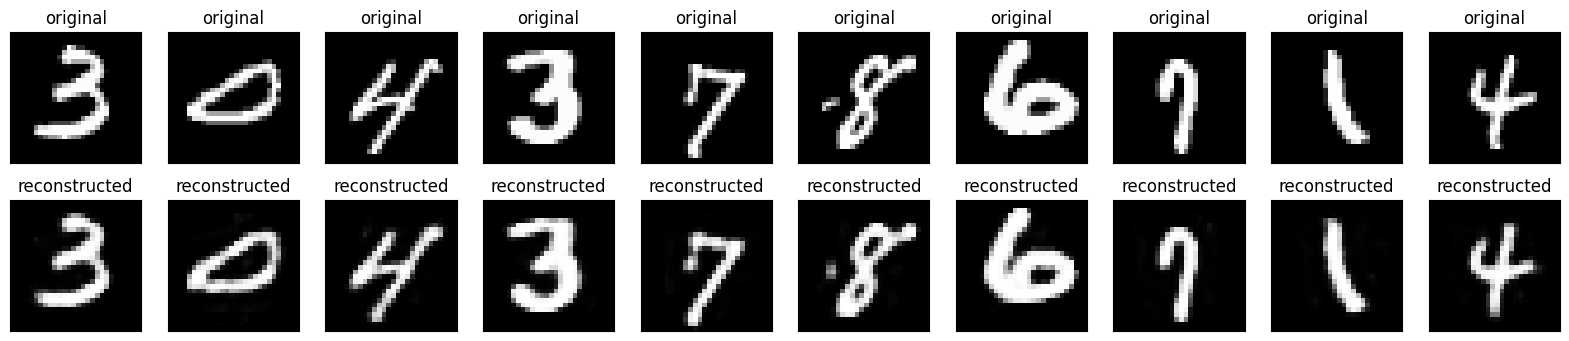

In [10]:
n = 10
plt.figure(figsize=(20,4))
for i in range(0,n):
    ax = plt.subplot(2,n,i+1) # 1 row ,n cols
    j = random.randint(0, 10000-1)
    plt.imshow(x_test[j])
    plt.title('original')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2,n,i+1+n) # 1 row ,n cols
    plt.imshow(decoded_imgs[j])
    plt.title('reconstructed')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)